In [1]:
import streamlit as st
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
%matplotlib inline

In [2]:
end = datetime.today().strftime('%Y-%m-%d')
start = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

df = yf.download('AAPL', '2015-01-01', end=datetime.now())



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data = df['Close']
dataset = data.values
training_data_len = int(np.ceil(len(dataset))*.95)

Ticker,AAPL
Date,
2015-01-02,24.320433
2015-01-05,23.635290
2015-01-06,23.637514
2015-01-07,23.968962
2015-01-08,24.889908
...,...
2025-04-07,181.460007
2025-04-08,172.419998
2025-04-09,198.850006


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

In [5]:
train_data = scaled_data[:training_data_len, :]
x_train = []
y_train = []

# creating a sliding window 
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # 0 gets only the first column, which means we will get a 1D Array
    y_train.append(train_data[i, 0])

# convert to numpy array since this is necessary before feeding it into deep learning models
x_train, y_train,  = np.array(x_train), np.array(y_train)




# Reshape X_train into 3D Shape (required by LSTM)
#                    (SAMPLE,  TIMESTEPS       , FEATURES)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [6]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [7]:
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len-60:, :]

X_train, y_train = [],[]
X_test = []
y_test = dataset[training_data_len:]


for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])

X_test = np.array(X_test)



X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train,epochs=20)    

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0134
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.3088e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.3357e-04
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.6559e-04
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 3.0980e-04
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.8311e-04
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.1182e-04
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.7253e-04
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.6005e-04
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 2.9055e-04
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.5605e-04
Epoch 12/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.0826e-04
Epoch 13/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 2.0003e-04
Epoch 14/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.2937e-04
Epoch 15/20
75/75 ━━━━━━━━━━━━

In [9]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean((predictions-y_test)**2))
print(rmse)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6.7059603783140975


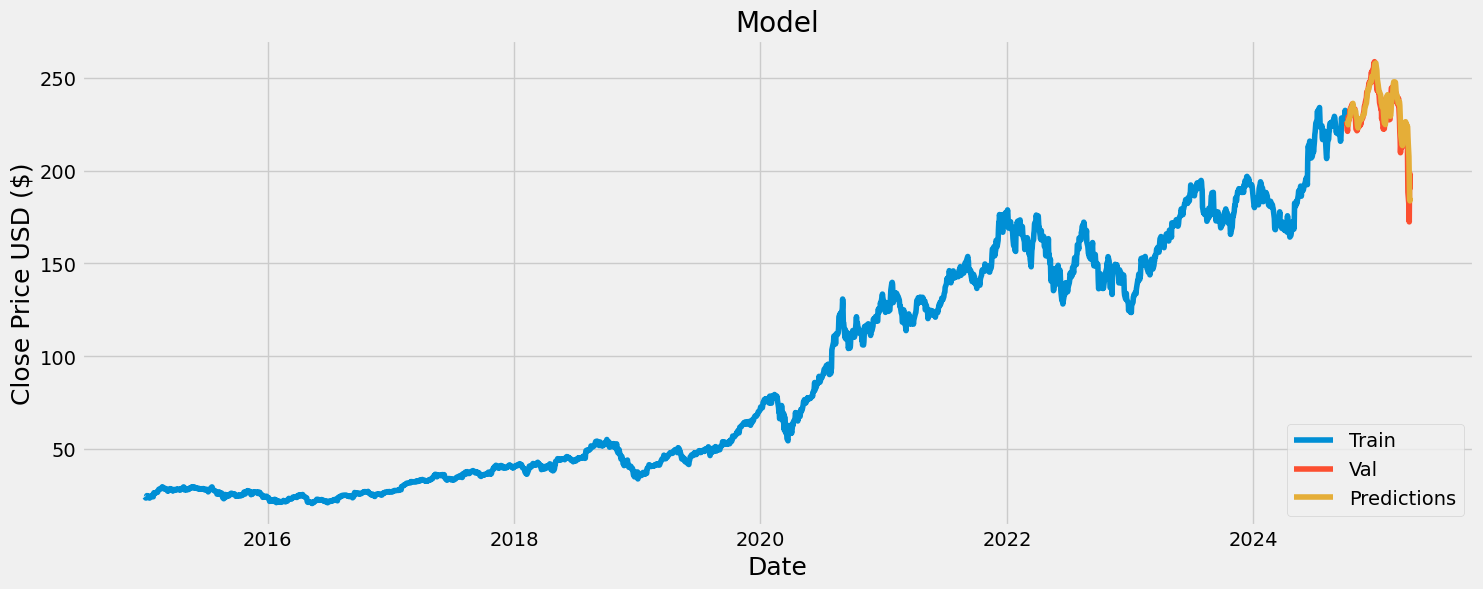

In [ ]:
plt.style.use("fivethirtyeight")
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['AAPL','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [11]:
valid['Predictions']

Date
2024-10-04    227.434280
2024-10-07    226.809143
2024-10-08    225.124908
2024-10-09    224.714844
2024-10-10    226.084579
                 ...    
2025-04-07    207.503876
2025-04-08    195.841690
2025-04-09    184.600113
2025-04-10    183.711044
2025-04-11    185.452988
Name: Predictions, Length: 130, dtype: float32